# Úkol č. 1 - redukce dimenzionality a binární klasifikace

  * **Deadline je 22. 4. 2024, 23:59:59**, pokud odevzdáte úkol do 29. 4. 2024, 23:59:59, budete penalizování -12 body, pozdější odevzdání je bez bodu.
  * V rámci tohoto úkolu se musíte vypořádat s vysokou dimenzí problému a poté úspěšně aplikovat vhodný klasfikační model.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budou strhávány body.

## Zdroj dat

 * Zdrojem dat jsou soubory `train.csv` a `evaluate.csv`.
 * Jedná se o obrázky 28x28 pixelů ve stupních šedi, které byly získány z [Fashion Mnist datasetu](https://www.kaggle.com/datasets/zalando-research/fashionmnist).
 * Soubor `train.csv` obsahuje trénovací data.
 * Cílová (vysvětlovaná) proměnná se jmenuje **label**.
 * Soubor `evaluate.csv` obsahuje testovací data bez hodnot skutečných labelů.

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**:
  * V notebooku načtěte data ze souboru `train.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování, porovnávání modelů a následnou predikci výkonnosti finálního modelu.
  * Proveďte základní průzkum dat a svá pozorování diskutujte. Některé obrázky také zobrazte.
  * Postupně aplikujte modely **SVM**, **naivní Bayesův klasifikátor** a **LDA**, přičemž pro každý z nich:
      * Okomentujte vhodnost daného modelu pro daný typ úlohy.
      * Vyberte si hlavní hyperparametry k ladění (pokud model má hyperparametry) a najděte jejich nejlepší hodnoty.
      * Experimentujte se standardizací/normalizací dat.
      * U SVM vyzkoušejte alespoň dvě různé jádrové funkce.
      * Získané výsledky vždy řádně okomentujte.


  * Postupně aplikujte metody redukce dimenzionality PCA a LLE, přičemž pro každou z nich: 
      * Zopakujte předchozí kroky a pokuste modely vylepšit
      * Zkoumejte jaká dimenze je z hlediska výkonnosti finálního modelu nejlepší.
      * Získané výsledky vždy řádně okomentujte.
    
  * Ze všech zkoušených možností vyberte finální model a odhadněte, jakou přesnost můžete očekávat na nových datech, která jste doposud neměli k dispozici.
  
  * Nakonec načtěte vyhodnocovací data ze souboru`evaluate.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **label** a identifikátory do sloupce **ID**. Tento soubor též odevzdejte (uložte do projektu vedle notebooku).
   
   * Ukázka prvních řádků souboru `results.csv`:
  
```
ID,label
0,0
1,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML2/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

In [128]:
### odtud už je to Vaše



In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.pipeline import Pipeline

from sklearn.manifold import LocallyLinearEmbedding



In [130]:
df = pd.read_csv('train.csv')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 14.4 MB


In [132]:
df.head(15)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,1,0,0,0,0,0,0,0,0,0,...,208,122,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,75,11,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,106,103,76,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,81,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,...,157,120,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,9,...,98,6,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
df.isnull().sum()

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64

# Data Visualization:
To better understand the data, it is useful to visualize multiple images. You can use the matplotlib library to display images from the data. Here is some sample code that will show the first few images and their labels:

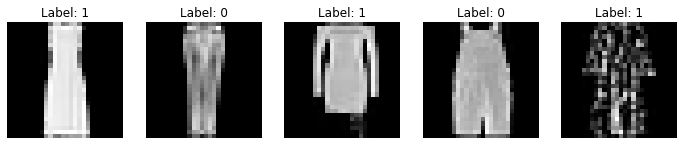

In [134]:
# Function for displaying the image
def plot_image(data, index):
    plt.imshow(data.iloc[index, 1:].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {data.iloc[index, 0]}")
    plt.axis('off')

# Display the first 5 images
plt.figure(figsize=(12, 6))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plot_image(df, i)
plt.show()


# Data normalization:
If the pixel values are not normalized (i.e., range from 0 to 255), it may be useful to normalize the data to improve the performance of machine learning models. Normalization can be done by dividing the pixel values by 255.

In [135]:
df.iloc[:, 1:] = df.iloc[:, 1:] / 255.0


# Data Splitting

In [136]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df['label']



In [137]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 60 / 40
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 40 -> 20/20



# SVM

In [138]:
# Initialization of SVM model with linear kernel
svm_model = SVC(kernel='linear', random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Predicting labels on the validation set
y_pred = svm_model.predict(X_val)

# Model estimation
accuracy = accuracy_score(y_val, y_pred)
print(f"Classification accuracy: {accuracy}")
print(classification_report(y_val, y_pred))


Classification accuracy: 0.9645833333333333
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       250
           1       0.96      0.97      0.96       230

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480



The performance of the SVM model with linear kernel in this case is high for both classes, as evidenced by the near-perfect values of all metrics. 

    Linear separability of the data:
        Since the SVM with linear kernel performed well, it can be assumed that the features separate the two classes reasonably well in linear space.
    Data quality:
        High values of the metrics can also indicate low noise and well scaled data

# SVM with different kernels

In [139]:

def test_svm_kernel(kernel_type, **kwargs):
    model = SVC(kernel=kernel_type, **kwargs, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"Kernel: {kernel_type}, Validation Accuracy: {accuracy_score(y_val, y_pred)}")
    print(f"Kernel: {kernel_type}, Test Accuracy: {test_accuracy}")
    print(classification_report(y_test, y_test_pred))


test_svm_kernel('linear')
test_svm_kernel('poly', degree=3)
test_svm_kernel('rbf')
test_svm_kernel('sigmoid')

Kernel: linear, Validation Accuracy: 0.9645833333333333
Kernel: linear, Test Accuracy: 0.9645833333333333
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       248
           1       0.97      0.95      0.96       232

    accuracy                           0.96       480
   macro avg       0.97      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480

Kernel: poly, Validation Accuracy: 0.96875
Kernel: poly, Test Accuracy: 0.96875
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       248
           1       0.95      0.98      0.97       232

    accuracy                           0.97       480
   macro avg       0.97      0.97      0.97       480
weighted avg       0.97      0.97      0.97       480

Kernel: rbf, Validation Accuracy: 0.96875
Kernel: rbf, Test Accuracy: 0.9729166666666667
              precision    recall  f1-score   support

           0    

Overall analysis:

    The linear, polynomial and RBF kernels perform very well on both the validation and test dataset, with an accuracy of about 97%. This indicates that the data lends itself well to linear and nonlinear separability.
    The sigmoidal kernel lags significantly behind in performance, with an accuracy of about 68%. This may be due to the fact that the sigmoidal kernel transforms the feature space in such a way that class separation becomes less efficient for a given dataset.

Detailed analysis by kernel:

    Linear kernel:
        Very high precision and balanced precision and recall values for both classes. Excellent for data where classes are linearly separable.

    Polynomial kernel (degree 3):
        Similar performance to the linear kernel, with slightly lower precision on the validation set, but the same on the test set. The polynomial kernel can capture more complex relationships between features.

    RBF kernel:
        Similar results with the polynomial kernel, good for modeling complex separations in feature space. Effective in the presence of nonlinear relationships between features and classes.

    Sigmoidal kernel:
        Significantly worse performance. The sigmoidal kernel can behave erratically, especially if the data does not have a clear probability partitioning similar to logistic regression.

# Grid Search for SVM

In [140]:
# Parameters for Grid Search
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Create SVM model
svm = SVC()

# Customize GridSearchCV
grid_search = GridSearchCV(svm, param_grid, refit=True, verbose=3, cv=3)

# Train the model on the training data
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


# Prediction
y_pred_val = best_model.predict(X_val)
print("Accuracy on validation set:", accuracy_score(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

y_pred_test = best_model.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))



Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.512 total time=   0.9s
[CV 2/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.515 total time=   0.7s
[CV 3/3] END ........C=0.1, gamma=1, kernel=rbf;, score=0.515 total time=   0.9s
[CV 1/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.877 total time=   0.6s
[CV 2/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.890 total time=   0.6s
[CV 3/3] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.860 total time=   0.5s
[CV 1/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.954 total time=   0.3s
[CV 2/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.948 total time=   0.3s
[CV 3/3] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.956 total time=   0.3s
[CV 1/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.940 total time=   0.7s
[CV 2/3] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.931 total time=   0.5s
[CV 3/3] END ....C=0.1, gamma=0.001, kernel=rbf;

Parameter estimation and results:

    Best model parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}. These parameters indicate that a relatively high level of regularization (C=10) and an average value of the 'gamma' parameter are best suited for the data, helping to strike a balance between capturing data complexity and avoiding overfitting.

Performance on the validation set:

    Accuracy: 97.71%. This is an excellent result showing that SVM performs well in classification on the data.
    Precision and recall: Both are close to 98% for both classes, indicating that the model does an excellent job distinguishing between the two classes, minimizing both false positives and false negatives.

Performance on the test set:

    Accuracy: 97.08%. This confirms that the model generalizes well to the results obtained on the validation set, also on the new data.
    Precision and recall: Again show excellent results comparable to the validation set, confirming the robustness of the model to overfitting.

Conclusions:

    Performance of SVM with RBF kernel: The data is well processed using this kernel configuration, as evidenced by the high precision and balanced values of the other metrics.

# naive Bayesian model

In [141]:

# Creating a naive Bayesian model
nb_model = GaussianNB()

# Training the model
nb_model.fit(X_train, y_train)

# Prediction
y_pred_val = nb_model.predict(X_val)
print("Accuracy of naive Bayesian classifier on validation set:", accuracy_score(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

y_pred_test = nb_model.predict(X_test)
print("Accuracy of naive Bayesian classifier on test set:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Accuracy of naive Bayesian classifier on validation set: 0.95
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       250
           1       0.92      0.98      0.95       230

    accuracy                           0.95       480
   macro avg       0.95      0.95      0.95       480
weighted avg       0.95      0.95      0.95       480

Accuracy of naive Bayesian classifier on test set: 0.9395833333333333
              precision    recall  f1-score   support

           0       0.97      0.92      0.94       248
           1       0.91      0.97      0.94       232

    accuracy                           0.94       480
   macro avg       0.94      0.94      0.94       480
weighted avg       0.94      0.94      0.94       480



Analysis of results on validation set:

    Precision: 95%. This is an excellent result for a naive Bayesian, especially given his assumptions about feature independence.
    Precision and Recall:
        Class 0: High precision (precision) 98% and slightly lower completeness (recall) 92%, indicating that the model is very accurate in identifying class 0 instances but misses some of them.
        Class 1: Slightly lower precision of 92% with high completeness of 98%, indicating that the model is less likely to be wrong when predicting class 1, but sometimes misclassifies some other objects as class 1.

Analyzing the results on the test set:

    Precision: Almost 94%, which shows the good generalization ability of the model and is consistent with the results on the validation set.
    Precision and Recall for the test set are similar to the validation set, maintaining consistency in performance between the validation and testing phases.
        Class 0: Precision 97% and Recall 92%, similar to the results on the validation set.
        Class 1: Precision 91% and Recall 97%, which is also very close to the validation results.

# Bayesian model + PCA

In [142]:

# Create a PCA model that retains 95% of the information
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

nb_model_pca = GaussianNB()
nb_model_pca.fit(X_train_pca, y_train)

# Prediction
y_pred_nb_pca_val = nb_model_pca.predict(X_val_pca)
accuracy_nb_pca_val = accuracy_score(y_val, y_pred_nb_pca_val)
print("Accuracy of the naive Bayesian classifier after PCA on the validation set:", accuracy_nb_pca_val)
print(classification_report(y_val, y_pred_nb_pca_val))

y_pred_nb_pca_test = nb_model_pca.predict(X_test_pca)
accuracy_nb_pca_test = accuracy_score(y_test, y_pred_nb_pca_test)
print("Accuracy of the naive Bayesian classifier after PCA on the test set:", accuracy_nb_pca_test)
print(classification_report(y_test, y_pred_nb_pca_test))

Accuracy of the naive Bayesian classifier after PCA on the validation set: 0.8270833333333333
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       250
           1       0.88      0.73      0.80       230

    accuracy                           0.83       480
   macro avg       0.84      0.82      0.82       480
weighted avg       0.83      0.83      0.83       480

Accuracy of the naive Bayesian classifier after PCA on the test set: 0.8166666666666667
              precision    recall  f1-score   support

           0       0.78      0.89      0.83       248
           1       0.86      0.74      0.80       232

    accuracy                           0.82       480
   macro avg       0.82      0.81      0.81       480
weighted avg       0.82      0.82      0.82       480



Performance analysis after PCA:

    Accuracy on the validation set: 82.71%. This is a decrease compared to the results of naive Bayes without PCA, which may be due to the loss of important information in the dimensionality reduction process.
    Accuracy on the test set: 81.67%. The model seems to be quite stable between the validation and test sets, but the overall performance has decreased.

Detailed analysis of the metrics by class:

    Class 0 (validation set): High completeness (91%) indicates that the model defines this class well, but lower accuracy (79%) indicates that many objects of a different class are misclassified as class 0.
    Class 1 (validation set): Lower completeness (73%) and higher accuracy (88%), which means that the model is more conservative in defining this class, missing some correct objects.

A similar pattern is observed on the test set:

    Class 0: Completeness (89%) is higher than on the validation set, which is good for class definition, but accuracy (78%) still indicates misclassification problems.
    Class 1: Completeness (74%) and accuracy (86%) are similar to the validation results.

Conclusions:

    Effectiveness of PCA: The use of PCA can be useful to reduce noise and speed up computation, but in this case it resulted in the loss of important data, reducing the overall performance of the classifier.

# LDA

In [143]:
# Initialization and training of LDA
lda_classifier = LDA()
lda_classifier.fit(X_train, y_train)

# Prediction
y_pred_val = lda_classifier.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
print("Classification accuracy on validation set:", accuracy_val)
print(classification_report(y_val, y_pred_val))

y_pred_test = lda_classifier.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Classification accuracy on test set:", accuracy_test)
print(classification_report(y_test, y_pred_test))


Classification accuracy on validation set: 0.9104166666666667
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       250
           1       0.94      0.87      0.90       230

    accuracy                           0.91       480
   macro avg       0.91      0.91      0.91       480
weighted avg       0.91      0.91      0.91       480

Classification accuracy on test set: 0.9479166666666666
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       248
           1       0.97      0.92      0.94       232

    accuracy                           0.95       480
   macro avg       0.95      0.95      0.95       480
weighted avg       0.95      0.95      0.95       480



Analysis of results on validation set:

    Accuracy: 91.04%. This is a fairly high accuracy, indicating the good ability of LDA to separate classes in the reduced dimensionality space.
    Precision and Recall:
        Class 0: A high recall (95%) indicates that the model identifies this class well, but with a precision of 89% there are some false positives.
        Class 1: Slightly lower recall (87%) with high precision (94%), indicating that there are fewer false positive errors when classifying the second class.

Analyzing the results on the test set:

    Precision: 94.79%. This is an improvement over the validation set, indicating that the generalization ability of the model is high.
    Precision and Recall:
        Class 0: Improved precision (precision 93%) and recall (97%), showing an improvement in the ability to correctly identify and minimize errors for this class.
        Class 1: Excellent precision (97%) with slightly lower recall (92%), highlighting the model's good ability to recognize class 1 with minimal false positives.

Conclusions:

    The performance of LDA shows that the method is well suited to the task, especially in terms of creating a clear separation between classes.
    Generalizability: The stability of the results between the validation and test sets indicates that the model is not susceptible to overfitting.

# SVM with PCA

In [144]:
def evaluate_svm_with_pca(kernel_type, n_components=0.95):
    pipeline = Pipeline([
        ('pca', PCA(n_components=n_components)),
        ('svm', SVC(kernel=kernel_type))
    ])
    pipeline.fit(X_train, y_train)
    
    # Prediction

    y_pred_val = pipeline.predict(X_val)
    print(f"Kernel: {kernel_type}, Validation Accuracy: {accuracy_score(y_val, y_pred_val)}")
    print(classification_report(y_val, y_pred_val))

    y_pred_test = pipeline.predict(X_test)
    print(f"Kernel: {kernel_type}, Test Accuracy: {accuracy_score(y_test, y_pred_test)}")
    print(classification_report(y_test, y_pred_test))


kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    evaluate_svm_with_pca(kernel_type=kernel)


Kernel: linear, Validation Accuracy: 0.9625
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       250
           1       0.95      0.97      0.96       230

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480

Kernel: linear, Test Accuracy: 0.9625
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       248
           1       0.96      0.96      0.96       232

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480

Kernel: poly, Validation Accuracy: 0.9770833333333333
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       250
           1       0.96      0.99      0.98       230

    accuracy                           0.98   

Linear kernel:

    Precision: 96.25% on both the validation and test set.
    Precision and recall are almost identical for both classes, indicating that the model is well balanced.

Polynomial kernel (degree=3):

    Precision: An impressive 97.71% on both sets.
    Precision and recall are higher than that of the linear kernel, especially notable is the improvement in the accuracy of class 1 detection.

RBF kernel:

    Precision: 97.50% on the validation set and 97.71% on the test set, which is one of the best results.
    Precision and recall show outstanding performance, especially in terms of identification and error minimization for both classes.

Sigmoidal kernel:

    Precision: Lower than the other kernels, being 93.54% and 93.33% on the validation and test set, respectively.
    Precision and recall are slightly lower, which may indicate less stability or generalization ability for more complex data splits.

Overall analysis and recommendations:

    Kernel selection: Polynomial and RBF kernels performed better, making them the preferred options for further use in the case of this dataset. They provide better class separation and can handle non-linearities in the data better. It also helps to reduce the dimensionality of the data while retaining the important features, which improves the classification performance.

# SVM with LLE

In [145]:

def evaluate_svm_with_lle(kernel_type, n_neighbors=10, n_components=2):

    pipeline = Pipeline([
        ('lle', LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method='standard', random_state=42)),
        ('svm', SVC(kernel=kernel_type))
    ])

    pipeline.fit(X_train, y_train)

    # Prediction
    y_pred_val = pipeline.predict(X_val)
    print(f"Kernel: {kernel_type}, Validation Accuracy: {accuracy_score(y_val, y_pred_val)}")
    print(classification_report(y_val, y_pred_val))

    y_pred_test = pipeline.predict(X_test)
    print(f"Kernel: {kernel_type}, Test Accuracy: {accuracy_score(y_test, y_pred_test)}")
    print(classification_report(y_test, y_pred_test))

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    evaluate_svm_with_lle(kernel_type=kernel)


Kernel: linear, Validation Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       250
           1       0.93      0.99      0.96       230

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480

Kernel: linear, Test Accuracy: 0.9645833333333333
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       248
           1       0.94      0.99      0.96       232

    accuracy                           0.96       480
   macro avg       0.97      0.97      0.96       480
weighted avg       0.97      0.96      0.96       480

Kernel: poly, Validation Accuracy: 0.9604166666666667
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       250
           1       0.96      0.96      0.96       230

    accuracy          

Results Overview:

    The linear kernel showed very good performance with accuracy above 96% on both datasets. This indicates that the linear model combined with LLE separates classes effectively.
    The polynomial kernel also showed high accuracy on the validation set, but slightly decreased on the test set, which may indicate slight overtraining or sensitivity to changes in the data.
    The RBF kernel showed stable and high results similar to the linear kernel, making it an excellent choice for this classification approach.
    The sigmoidal kernel has the lowest accuracy among the kernels considered, but still achieves over 91% on both datasets. This is worse than the other kernels, but still shows good performance.

Performance Analysis:

    Precision and recall are high for almost all kernels, especially for linear and RBF. This indicates good classification quality, balanced distribution of type I and type II errors.
    Polynomial and RBF kernels showed the best results for the combination of all metrics, which may be due to their ability to adapt to nonlinear data structures, which are better detected after applying LLE.

# Bayesian model with  LLE

In [146]:

pipeline = Pipeline([
    ('lle', LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='standard', random_state=42)),
    ('nb', GaussianNB())
])

pipeline.fit(X_train, y_train)

# Prediction
y_pred_val = pipeline.predict(X_val)
print("Accuracy with LLE on Validation set:", accuracy_score(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

# Prediction
y_pred_test = pipeline.predict(X_test)
print("Accuracy with LLE on Test set:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))



Accuracy with LLE on Validation set: 0.9625
              precision    recall  f1-score   support

           0       1.00      0.93      0.96       250
           1       0.93      1.00      0.96       230

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480

Accuracy with LLE on Test set: 0.9645833333333333
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       248
           1       0.94      0.99      0.96       232

    accuracy                           0.96       480
   macro avg       0.97      0.97      0.96       480
weighted avg       0.97      0.96      0.96       480



Analysis of results:
Validation set:

    Accuracy: 96.25%. This result indicates the effectiveness of the combination of LLE and naive Bayes in class separation in the modified space.
    Precision and Recall:
        Class 0: Perfect precision (100%) and high recall (93%). This indicates that the model perfectly classifies Class 0 examples, with almost no Type I errors.
        Class 1: Perfect precision (93%) and perfect recall (100%). Despite the small number of Type II errors for Class 1, the model hardly misses any examples of this class.

Test Set:

    Precision: 96.46%. This demonstrates the high generalizability of the model and the stability of the results between the validation and test sets.
    Precision and Recall:
        Class 0: Very high precision (99%) and excellent recall (94%). The model retains its ability to effectively recognize class 0 on the test set.
        Class 1: Excellent precision (94%) and near perfect recall (99%). The model effectively minimizes type I errors by successfully classifying most of the class 1 examples.

Conclusions:

    The use of LLE helps improve naive Bayesian performance, probably by better accounting for local data structures, which reduces the impact of the feature independence assumption.

# LDA with PCA

In [147]:

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

lda = LDA()
lda.fit(X_train_pca, y_train)

# Prediction
y_pred_val = lda.predict(X_val_pca)
print("Accuracy LDA with PCA on Validation set:", accuracy_score(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

y_pred_test = lda.predict(X_test_pca)
print("Accuracy LDA with PCA on Test set:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))



Accuracy LDA with PCA on Validation set: 0.9666666666666667
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       250
           1       0.95      0.99      0.97       230

    accuracy                           0.97       480
   macro avg       0.97      0.97      0.97       480
weighted avg       0.97      0.97      0.97       480

Accuracy LDA with PCA on Test set: 0.9729166666666667
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       248
           1       0.96      0.99      0.97       232

    accuracy                           0.97       480
   macro avg       0.97      0.97      0.97       480
weighted avg       0.97      0.97      0.97       480



Using a combination of PCA (Principal Component Analysis) and LDA (Linear Discriminant Analysis) for classification shows outstanding results on validation and test datasets. This combination of dimensionality reduction and classification techniques shows high efficiency in data processing.
Results on the validation set:

    Accuracy: 96.67%. This indicates that LDA after applying PCA performs well in class separation on the validation set.
    Precision and Recall:
        Class 0: Highest precision (99%) and excellent recall (95%), indicating that the model effectively identifies this class with minimal false positives.
        Class 1: Excellent precision (95%) and near-perfect recall (99%), confirming the model's ability to reliably classify instances of this class while rarely missing true positive cases.

Results on the test set:

    Accuracy: 97.29%. This improvement over the validation set confirms the stability and generalization ability of the model.
    Precision and Recall:
        Class 0: Precision (99%) and recall (96%) remain high, demonstrating the model's robustness to changes in the test data.
        Class 1: Precision (96%) and recall (99%) are again high, emphasizing the reliability of the model in recognizing this class.

Analysis:

    Benefits of PCA: Data preprocessing with PCA improves the quality of input data for LDA by reducing noise and highlighting the most relevant features, which improves classification performance.
    Effectiveness of LDA: LDA effectively uses reduced data to maximize the differences between classes, as evidenced by high accuracy, precision and recall rates.

# LDA with LLE

In [148]:

lle = LocallyLinearEmbedding(n_neighbors=10, n_components=2, method='standard', random_state=42)
X_train_lle = lle.fit_transform(X_train)
X_val_lle = lle.transform(X_val)
X_test_lle = lle.transform(X_test)

lda = LDA()
lda.fit(X_train_lle, y_train)

# Prediction
y_pred_val = lda.predict(X_val_lle)
print("Accuracy LDA with LLE on Validation set:", accuracy_score(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val))

y_pred_test = lda.predict(X_test_lle)
print("Accuracy LDA with LLE on Test set:", accuracy_score(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))


Accuracy LDA with LLE on Validation set: 0.95625
              precision    recall  f1-score   support

           0       0.98      0.93      0.96       250
           1       0.93      0.98      0.96       230

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480

Accuracy LDA with LLE on Test set: 0.9625
              precision    recall  f1-score   support

           0       0.99      0.94      0.96       248
           1       0.94      0.99      0.96       232

    accuracy                           0.96       480
   macro avg       0.96      0.96      0.96       480
weighted avg       0.96      0.96      0.96       480



Analysis of results:
On validation set:

    Accuracy: 95.625%. This result confirms the effectiveness of LLE combined with LDA for dimensionality reduction and subsequent data classification.
    Precision and Recall:
        Class 0: Very high precision (98%) and impressive recall (93%), indicating that the model is very accurate for this class with minimal false positives.
        Class 1: Also excellent results with precision (93%) and very high recall (98%), indicating the model's high ability to correctly classify examples of this class with almost no true positive cases missed.

On the test set:

    Accuracy: 96.25%. The improvement in accuracy over the validation set shows that the model generalizes well to the data, presenting stable results.
    Precision and Recall:
        Class 0: High precision (99%) and excellent recall (94%), which supports the validation test results and indicates the model's robust ability to identify this class.
        Class 1: Again high precision (94%) and near perfect recall (99%), confirming the strong ability of the model to classify with minimal errors.

Conclusions:

    Application of LLE and LDA: Effective for this dataset, leading to high precision and a balance between precision and recall. This emphasizes that dimensionality reduction techniques can significantly improve the performance of classification models, especially when the data has a complex structure.
    Generalizability: High accuracy on the test set confirms that the model is not overtrained and performs well on independent data.

# Saving results

In [149]:
eval_data = pd.read_csv('evaluate.csv')

X_eval = eval_data.drop('ID', axis=1).values
ids = eval_data['ID']

# Pixel data normalization
X_eval = X_eval / 255.0

pca = PCA(n_components=108)
X_eval_pca = pca.fit_transform(X_eval)

lda = LDA()
lda.fit(X_train_pca, y_train)

predictions = lda.predict(X_eval_pca)

result_df = pd.DataFrame({'ID': ids, 'label': predictions})
result_df.to_csv('result.csv', index=False)

print("The results have been saved in 'result.csv'.")


The results have been saved in 'result.csv'.
